***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [4]:
df = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\Estistica com python_frequencias e medidas\Curso de Estatística\dados.csv', sep=',')

### Visualize o conteúdo do DataFrame

In [5]:
df.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [81]:
classes = [df['Renda'].min(), 2*788, 5*788, 15*788, 25*788, df['Renda'].max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [82]:
label = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [83]:
frequencia = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=label, include_lowest=True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [84]:
percentuais = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=label, include_lowest=True), normalize=True)*100
percentuais

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [85]:
dist_frequencia = pd.DataFrame({'Frequencia' : frequencia, 'Percentual (%)' : percentuais})
dist_frequencia

,Frequencia,Percentual (%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot: >

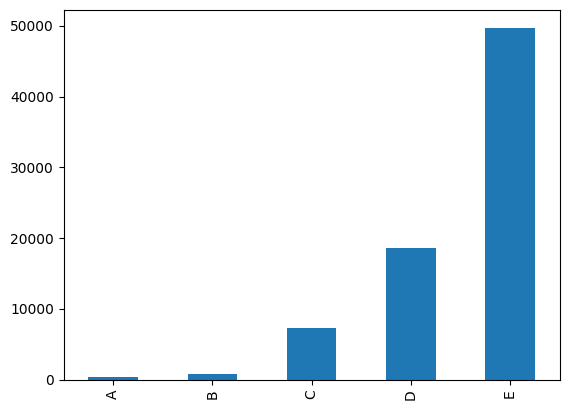

In [86]:
dist_frequencia['Frequencia'].sort_values().plot.bar()

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [25]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<AxesSubplot: >

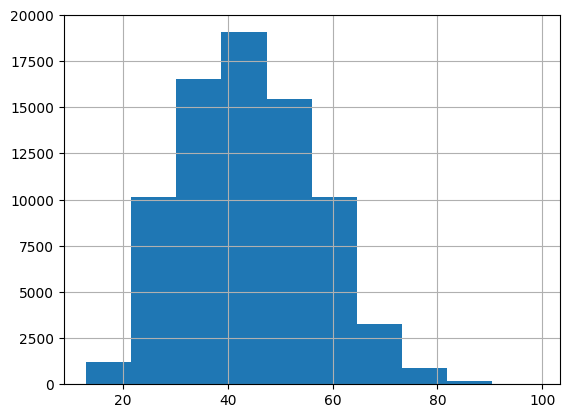

In [26]:
df['Idade'].hist()

<AxesSubplot: >

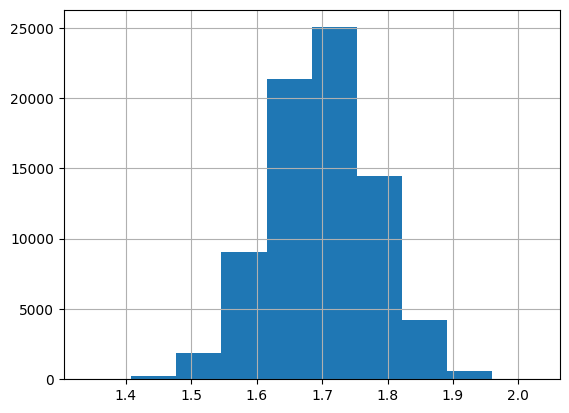

In [27]:
df['Altura'].hist()

<AxesSubplot: >

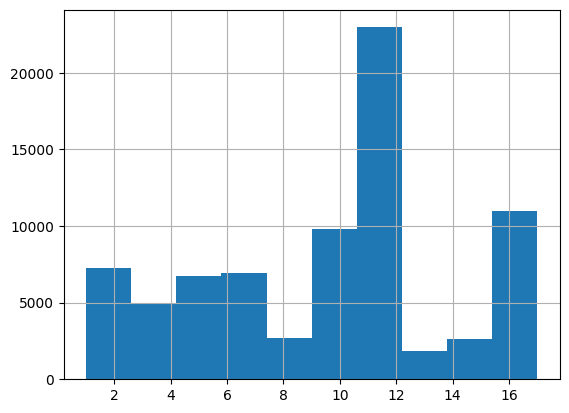

In [29]:
df['Anos de Estudo'].hist()

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18552\2480583435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('Renda < 20000'))


<AxesSubplot: ylabel='Density'>

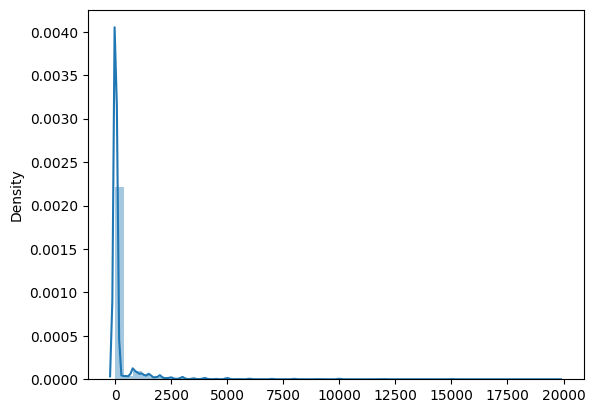

In [30]:
sns.distplot(df.query('Renda < 20000'))

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [31]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [45]:
frequencia = pd.crosstab(df['Sexo'], df['Cor'])
frequencia.rename(index=sexo, columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [47]:
percentuais = pd.crosstab(df['Sexo'], df['Cor'], normalize=True)*100
percentuais.rename(index=sexo, columns=cor, inplace=True)
percentuais

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [48]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [49]:
df['Renda'].median()

1200.0

### Obtenha a moda

In [87]:
df['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [51]:
df['Renda'].mad()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18552\3676593065.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['Renda'].mad()


1526.4951371638058

### Obtenha a variância

In [52]:
df['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [53]:
df['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [59]:
result = pd.crosstab(df['Sexo'],df['Cor'],aggfunc={'mean', 'median', 'max'}, values=df['Renda'])
result.rename(index=sexo, columns=cor, inplace=True)
result

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

frequencia.

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [62]:
result = pd.crosstab(df['Sexo'],df['Cor'],aggfunc={'mad', 'var', 'std'}, values=df['Renda'])
result.rename(index=sexo, columns=cor, inplace=True)
result

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18552\1933539978.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  result = pd.crosstab(df['Sexo'],df['Cor'],aggfunc={'mad', 'var', 'std'}, values=df['Renda'])
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18552\1933539978.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  result = pd.crosstab(df['Sexo'],df['Cor'],aggfunc={'mad', 'var', 'std'}, values=df['Renda'])
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18552\1933539978.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  result = pd.crosstab(df['Sexo'],df['Cor'],aggfunc={'mad', 'var', 'std'}, values=df['Renda'])
C:\Users\Gabriel\AppData\Local\

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

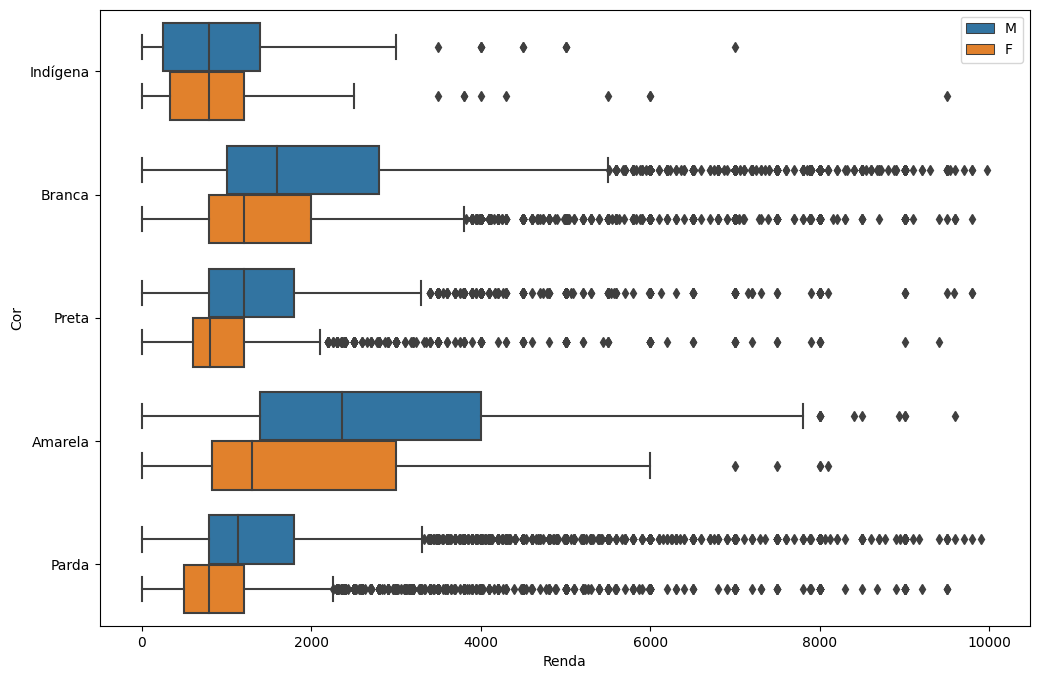

In [109]:
ax =sns.boxplot(x='Renda', y='Cor', orient='h', data= df.query('Renda < 10000'), hue='Sexo')
ax.figure.set_size_inches(12, 8)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'])

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [118]:
from scipy import stats
stats.percentileofscore(df['Renda'], 788, kind='weak')


28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [119]:
df['Renda'].quantile(.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [126]:
result = pd.crosstab(df['Anos de Estudo'], df['Sexo'], aggfunc=['mean', 'mean', 'max', 'std'], values=df['Renda'])
result.rename(index=anos_de_estudo, columns=sexo, inplace=True)
result

mean                            \
Sexo                              Masculino     Feminino    Masculino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   799.494638   516.201748   799.494638   
1 ano                            895.629047   492.771987   895.629047   
2 anos                           931.178986   529.911638   931.178986   
3 anos                          1109.203862   546.853916  1109.203862   
4 anos                          1302.329283   704.279111  1302.329283   
5 anos                          1338.653218   781.389776  1338.653218   
6 anos                          1448.875419   833.732824  1448.875419   
7 anos                          1465.497940   830.751004  1465.497940   
8 anos                          1639.396667   933.615351  1639.396667   
9 anos                          1508.038850   868.021700  1508.038850   
10 anos                         1731.270847   925.919225  1731.270847   
11 anos                         2117.060504  1286.790889  2117.060504   
12 anos                         2470.330776  1682.313725  2470.330776   
13 anos                         3195.099154  1911.730047  3195.099154   
14 anos                         3706.620269  2226.460457  3706.620269   
15 anos ou mais                 6134.279790  3899.513231  6134.279790   
Não determinados                1295.761905   798.174419  1295.761905   

                                                  max                   std  \
Sexo                               Feminino Masculino Feminino    Masculino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   516.201748     30000    10000  1023.904884   
1 ano                            492.771987     30000     2000  1331.950552   
2 anos                           529.911638     40000     4000  1435.173827   
3 anos                           546.853916     80000     3500  2143.800133   
4 anos                           704.279111     50000    10000  1419.821787   
5 anos                           781.389776     35000     8000  1484.650587   
6 anos                           833.732824     25000     6000  1476.628602   
7 anos                           830.751004     40000     9000  1419.708673   
8 anos                           933.615351     30000    18000  1515.583715   
9 anos                           868.021700     60000    20000  2137.664774   
10 anos                          925.919225     45000     6000  2078.609734   
11 anos                         1286.790889    200000   100000  2676.538942   
12 anos                         1682.313725     30000   120000  2268.081538   
13 anos                         1911.730047     25000    20000  2797.116800   
14 anos                         2226.460457     50000    20000  3987.214974   
15 anos ou mais                 3899.513231    200000   100000  7447.613594   
Não determinados                 798.174419      7000     3000   979.648745   

                                             
Sexo                               Feminino  
Anos de Estudo                               
Sem instrução e menos de 1 ano   639.311534  
1 ano                            425.291842  
2 anos                           498.234168  
3 anos                           424.124446  
4 anos                           629.553397  
5 anos                           635.782641  
6 anos                           574.547028  
7 anos                           602.038029  
8 anos                           896.781213  
9 anos                           973.221652  
10 anos                          620.611907  
11 anos                         1819.040417  
12 anos                         4851.833513  
13 anos                         2053.789771  
14 anos                         2064.083336  
15 anos ou mais                 4212.770709  
Não determinados                 459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot: xlabel='Renda', ylabel='Anos de Estudo'>

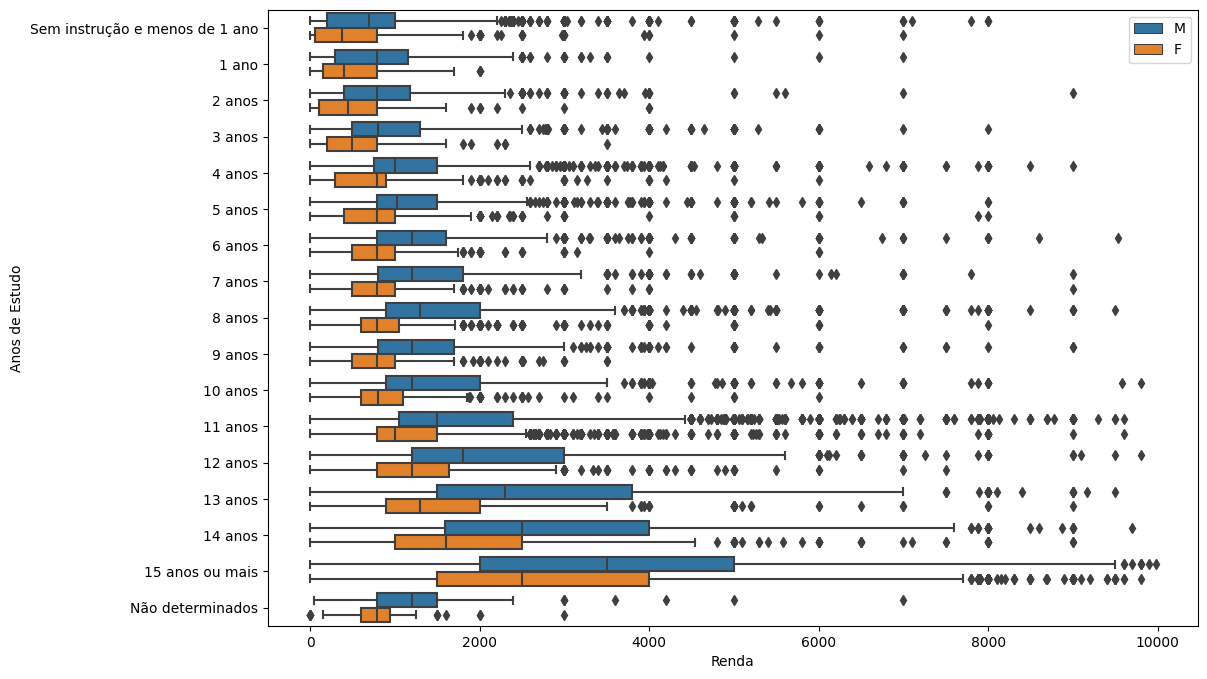

In [142]:
ax =sns.boxplot(data=df.query('Renda < 10000'), orient='h', x='Renda', y='Anos de Estudo', hue='Sexo')
ax.figure.set_size_inches(12, 8)
ax.set_yticklabels([key for key in anos_de_estudo.values()])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'])

ax


> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [147]:
result = df.groupby(['UF']).agg({'Renda' : ['mean', 'median', 'max', 'std']})
result.rename(index=uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

[Text(0, 0, 'Rondônia'),
 Text(0, 1, 'Acre'),
 Text(0, 2, 'Amazonas'),
 Text(0, 3, 'Roraima'),
 Text(0, 4, 'Pará'),
 Text(0, 5, 'Amapá'),
 Text(0, 6, 'Tocantins'),
 Text(0, 7, 'Maranhão'),
 Text(0, 8, 'Piauí'),
 Text(0, 9, 'Ceará'),
 Text(0, 10, 'Rio Grande do Norte'),
 Text(0, 11, 'Paraíba'),
 Text(0, 12, 'Pernambuco'),
 Text(0, 13, 'Alagoas'),
 Text(0, 14, 'Sergipe'),
 Text(0, 15, 'Bahia'),
 Text(0, 16, 'Minas Gerais'),
 Text(0, 17, 'Espírito Santo'),
 Text(0, 18, 'Rio de Janeiro'),
 Text(0, 19, 'São Paulo'),
 Text(0, 20, 'Paraná'),
 Text(0, 21, 'Santa Catarina'),
 Text(0, 22, 'Rio Grande do Sul'),
 Text(0, 23, 'Mato Grosso do Sul'),
 Text(0, 24, 'Mato Grosso'),
 Text(0, 25, 'Goiás'),
 Text(0, 26, 'Distrito Federal')]

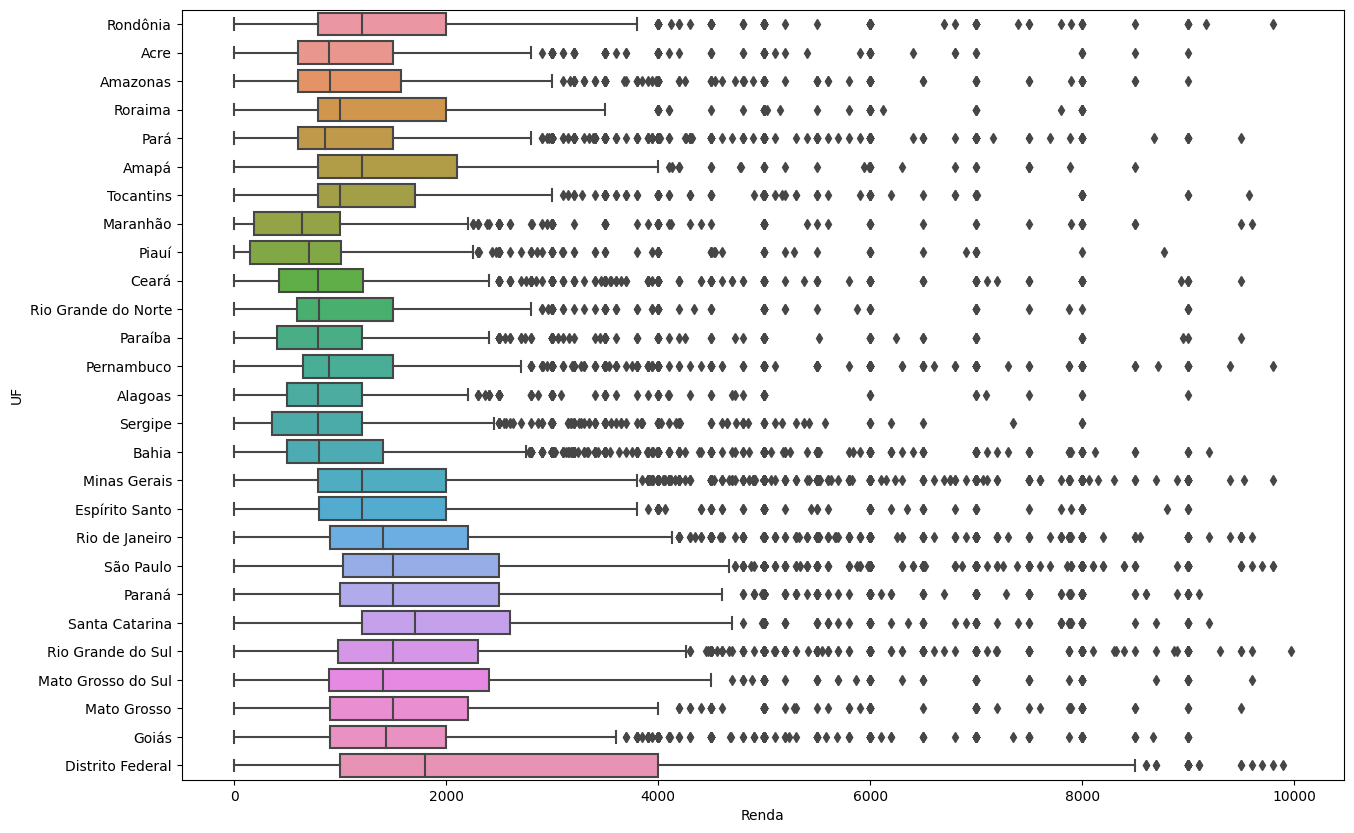

In [152]:
ax = sns.boxplot(data= df.query('Renda < 10000'), x='Renda', y='UF', orient='h')
ax.figure.set_size_inches(15, 10)
ax.set_yticklabels([key for key in uf.values()])

> ### Conclusões

Escreva suas conclusões aqui...